# Pyber

1. The driver count is lower in rural cities compared to the suburban and urban areas indicating a correlation between the density of drivers and city type. 

2. In the rural areas the total rides count is skewed towards higher average fares while in the urban areas there is higher total rides and lower average fares. In suburban cities the relationship clusters around the average. 

3. The urban cities account for the highest share in the total fare, total rides and total driver count followed by suburban and then the rural areas

 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(1974)

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
 
# Combine the data into a single dataset
combined_data = pd.merge(city_data,ride_data, how = 'outer', on = 'city' )
# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
combined_data.count()

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64

In [3]:
city_data.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
#set dataframe  
df=pd.DataFrame(combined_data)
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

#Group by city 
by_city =df.groupby("city")  
by_city.head()
#Average fare per city 
avg_fare_by_city = by_city["fare"].mean()
avg_fare_by_city= pd.DataFrame(avg_fare_by_city)
avg_fare_by_city.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [7]:
#Total Number of Rides Per City

tot_rides_by_city = by_city["ride_id"].count()
tot_rides_by_city=pd.DataFrame(tot_rides_by_city)
tot_rides_by_city.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [8]:
# Filtering data by unique cities 

df2= (df.drop_duplicates(['city']))
df2.head()

#Total Number of Drivers Per City

tot_drivers_by_city = df2[["city", "driver_count"]]
tot_drivers_by_city= pd.DataFrame(tot_drivers_by_city)
tot_drivers_by_city.head() 

,city,driver_count
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [9]:
#City by type 
city_type = df2[["city","type"]]
city_type = pd.DataFrame(city_type)
city_type.head()

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [10]:
#data merge 
data1 = pd.merge(avg_fare_by_city,tot_rides_by_city, how ='outer', on='city' )
data1.head()
data2 = pd.merge(data1,tot_drivers_by_city, how ='outer', on='city' )
data2.head()
data3 = pd.merge(data2,city_type, how ='outer', on='city' )
data3.head()
data4 = data3.rename(columns ={"ride_id" : "total rides"})
data4.head()
organised_df = data4[["type","city","fare","total rides", "driver_count"]]
organised_df.head()

,type,city,fare,total rides,driver_count
0,Urban,Amandaburgh,24.641667,18,12
1,Urban,Barajasview,25.332273,22,26
2,Suburban,Barronchester,36.422500,16,11
3,Suburban,Bethanyland,32.956111,18,22
4,Rural,Bradshawfurt,40.064000,10,7


In [11]:
#Setting the data frames by the three city types

#Rural 
rural = organised_df.loc[organised_df["type"] == "Rural", :]
rural = pd.DataFrame(rural)
rural.head()

#Suburban 
suburban = organised_df.loc[organised_df["type"] == "Suburban", :]
suburban = pd.DataFrame(suburban)
suburban.head()
 
#Urban 
urban = organised_df.loc[organised_df["type"] == "Urban", :]
urban = pd.DataFrame(urban)
urban.head()

,type,city,fare,total rides,driver_count
0,Urban,Amandaburgh,24.641667,18,12
1,Urban,Barajasview,25.332273,22,26
6,Urban,Carriemouth,28.314444,27,52
7,Urban,Christopherfurt,24.501852,27,41
10,Urban,Deanville,25.842632,19,49


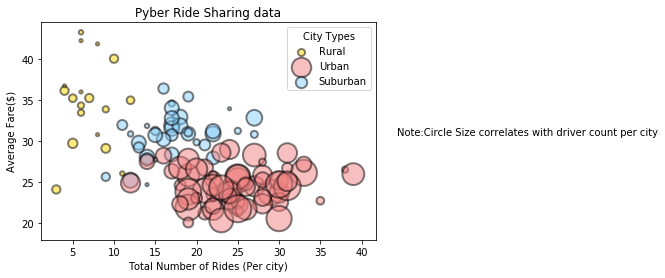

<Figure size 432x288 with 0 Axes>

In [16]:

#Obtain the x and y coordinates for each of the three city types
#Rural 
rural = organised_df.loc[organised_df["type"] == "Rural", :]
rural = pd.DataFrame(rural)
rural.head()

xr=rural['total rides']
yr=rural['fare']

colors = ["gold"] 
labels = "Rural"
size = rural['driver_count'] 

#Suburban 
suburban = organised_df.loc[organised_df["type"] == "Suburban", :]
suburban = pd.DataFrame(suburban)
suburban.head()

xsu=suburban['total rides']
ysu=suburban['fare']

colors1 = ["lightskyblue"]           
labels1 = "Suburban"  
size1 = suburban['driver_count'] 


#Urban 
urban = organised_df.loc[organised_df["type"] == "Urban", :]
urban = pd.DataFrame(urban)
urban.head()

xu=urban['total rides']
yu=urban['fare']

colors2 = ["lightcoral"]
size2 = urban['driver_count']  
labels2 = "Urban"

    
# Build the scatter plots for each city types
                    
ride_scatter_rural = plt.scatter(x=xr, y=yr, data=rural, marker="o", label = labels,
                                 color=colors, s=size*10, alpha=0.5,linewidth=2, edgecolor ="black")
ride_scatter_suburban = plt.scatter(x=xsu, y=ysu, data=suburban, marker="o", label = labels1,
                                    color=colors1,s=size1*10, alpha=0.5,linewidth=2, edgecolor = "black") 
ride_scatter_urban = plt.scatter(x=xu, y=yu, data=urban, marker="o", label = labels2,
                                 color=colors2,s=size2*10, alpha=0.5,linewidth=2, edgecolor = "black") 

                    
#Incorporate the other graph properties
 
plt.title("Pyber Ride Sharing data")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare($)")
    
# Incorporate a text label regarding circle siz
plt.figtext(.95, .5, 'Note:Circle Size correlates with driver count per city',verticalalignment='center',
            rotation='horizontal')

# add a legend 
plt.legend(handles= [ride_scatter_rural, ride_scatter_urban, ride_scatter_suburban],title='City Types', loc="best") 
plt.show()   
 


# Save Figure
plt.savefig("Pyber Ride Sharing Scatter.png")
plt.show()





## Total Fares by City Type

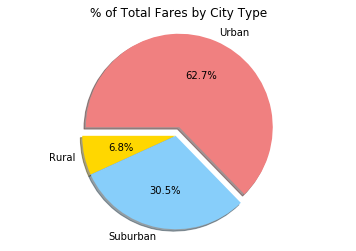

In [13]:
# Calculate Type Percents

#group rides by type 
by_type =df.groupby("type")
 
# total fares by type 
fare_by_type = by_type["fare"].sum()
fare_by_type

percent_fare_by_type = fare_by_type/df["fare"].sum()
percent_fare_by_type = percent_fare_by_type*100
percent_fare_by_type


# Build Pie Chart

explode = (0,0, 0.10)
colors = ["gold", "lightskyblue", "lightcoral"]
labels =["Rural", "Suburban", "Urban" ]

plt.title("% of Total Fares by City Type")
plt.pie(percent_fare_by_type, explode=explode, labels = labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")


# Save Figure

plt.savefig('Fare_bycitytype.png')

# Show Figure
plt.show()



## Total Rides by City Type

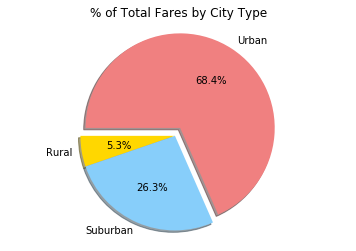

In [14]:
# Calculate Ride Percents
 
# total rides by type 
ride_by_type = by_type["ride_id"].count()
ride_by_type

percent_ride_by_type = ride_by_type/df["ride_id"].count()
percent_ride_by_type = percent_ride_by_type*100
percent_ride_by_type


# Build Pie Chart

explode = (0,0, 0.10)
colors = ["gold", "lightskyblue", "lightcoral"]
labels =["Rural", "Suburban", "Urban" ]

plt.title("% of Total Fares by City Type")
plt.pie(percent_ride_by_type, explode=explode, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")


# Save Figure

plt.savefig('ride_bycitytype.png')
# Show Figure
plt.show()


## Total Drivers by City Type

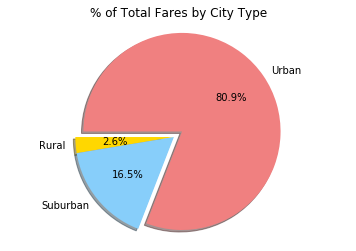

In [15]:

#group drivers by type 
by_type2 =df2.groupby("type")

 
# total drivers by type 
driver_by_type = by_type2["driver_count"].sum()
driver_by_type

percent_driver_by_type = driver_by_type/df2["driver_count"].sum()
percent_driver_by_type = percent_driver_by_type*100
percent_driver_by_type


# Build Pie Chart

explode = (0,0, 0.10)
colors = ["gold", "lightskyblue", "lightcoral"]
labels =["Rural", "Suburban", "Urban" ]

plt.title("% of Total Fares by City Type")
plt.pie(percent_driver_by_type, explode=explode, labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")


# Save Figure

plt.savefig('driver_bycitytype.png')

# Show Figure
plt.show()


